### World Game Sales(Uncompleted project)*

### About the dataset;

The sales coulmns are in millions i.e we multiply each sales column by 1000000

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as scistat

sales = pd.read_csv("vgsales.csv", low_memory=False)
sales 

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [2]:
sales.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

### Data Cleaning

Notice the year column has a wrong data type.

In [3]:
#Here we are converting the Year column data type the correct format.
import datetime as dt
sales['Year'] = pd.to_datetime(sales['Year'], format='%Y')
sales.dtypes

Rank                     int64
Name                    object
Platform                object
Year            datetime64[ns]
Genre                   object
Publisher               object
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

In [4]:
type(sales)

pandas.core.frame.DataFrame

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
sales.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
sales.isna().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [8]:
sales[['Year', 'Publisher']].isnull().sum()

Year         271
Publisher     58
dtype: int64

In [9]:
#Now we will use the subset parameter to drop rows in Year and Publisher columns that have missing values.

sales_copy = sales.copy()
sales_copy.dropna(subset=['Year', 'Publisher'], inplace=True)
sales_copy.shape

(16291, 11)

In [10]:
sales['Publisher'].isnull().sum()

58

In [11]:
sales_copy

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
sales_copy.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
sales_copy.describe()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Let us pull some insights from our data

In [14]:
#We want to know which genre is the most purchased

sales_copy['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [15]:
#Which publishers do people often buy

sales_copy.Publisher.value_counts(sort=True)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [16]:
# we want to get the unique count of the whole data

sales_copy['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

### To select rows using the filter function

In [17]:
# I want to know the publisher with the highest count of Action and sports, the top selling Genres

sales_copy[sales_copy['Genre']=='Action'].filter(like='Publisher').apply(pd.value_counts) #sorting in descending order

#sales_copy[sales_copy.Genre=='Action'].filter(like='Publisher').apply(pd.value_counts)

,Publisher
Activision,308
Namco Bandai Games,247
Ubisoft,193
THQ,193
Electronic Arts,182
...,...
Avalon Interactive,1
Gremlin Interactive Ltd,1
Video System,1
Agatsuma Entertainment,1


From the above result, we see that <i>Activision, Namco bandai Games, THQ, Ubisoft, and Electronic Arts</i> are the highest sold publishers of action games

In [18]:
sales_copy.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_17300\1317319387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sales_copy.corr()


,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
NA_Sales,-0.400315,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,0.941269,0.903264,0.612774,0.747964,1.000000


In [19]:
#Let's show a sample of a few rows of the sales_copy data

sales_copy.sample(20, random_state=None)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5537,5539,NCAA GameBreaker 2001,PS,2000-01-01,Sports,Sony Computer Entertainment,0.18,0.12,0.00,0.02,0.33
5493,5495,Extra Bases,GB,1990-01-01,Sports,Namco Bandai Games,0.00,0.00,0.33,0.00,0.33
6304,6306,Pro Race Driver,PS2,2002-01-01,Racing,Codemasters,0.13,0.10,0.00,0.03,0.27
15022,15025,Clannad: Mitsumi Mamoru Sakamichi de - Joukan,PSP,2010-01-01,Adventure,Prototype,0.00,0.00,0.02,0.00,0.02
12432,12434,Zero Escape: Zero Time Dilemma,3DS,2016-01-01,Adventure,Aksys Games,0.04,0.00,0.01,0.01,0.06
7972,7974,Jurassic: The Hunted,PS3,2009-01-01,Shooter,Activision,0.17,0.00,0.00,0.02,0.19
4486,4488,Just Dance: Summer Party,Wii,2011-01-01,Misc,Ubisoft,0.41,0.00,0.00,0.03,0.44
4840,4842,Rocket Power: Dream Scheme,GBA,2001-01-01,Action,THQ,0.29,0.11,0.00,0.01,0.40
7337,7339,Speed Racer: The Videogame,PS2,2008-01-01,Racing,Warner Bros. Interactive Entertainment,0.10,0.08,0.00,0.03,0.21
15285,15288,Guess the Logos,XB,2004-01-01,Puzzle,Sega,0.02,0.00,0.00,0.00,0.02


In [20]:
sales_copy[sales_copy.Genre=='Action'].filter(like='Publisher').apply(pd.value_counts)

,Publisher
Activision,308
Namco Bandai Games,247
Ubisoft,193
THQ,193
Electronic Arts,182
...,...
Avalon Interactive,1
Gremlin Interactive Ltd,1
Video System,1
Agatsuma Entertainment,1


Select columns with a specific data type

In [21]:
demo = sales_copy.select_dtypes(include=['float'])
demo

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.49,29.02,3.77,8.46,82.74
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...
16593,0.01,0.00,0.00,0.00,0.01
16594,0.01,0.00,0.00,0.00,0.01
16595,0.00,0.00,0.00,0.00,0.01
16596,0.00,0.01,0.00,0.00,0.01


In [22]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      16291 non-null  float64
 1   EU_Sales      16291 non-null  float64
 2   JP_Sales      16291 non-null  float64
 3   Other_Sales   16291 non-null  float64
 4   Global_Sales  16291 non-null  float64
dtypes: float64(5)
memory usage: 763.6 KB


In [23]:
#We can also exclude specific data types from our table

In [24]:
demo1 = sales_copy.select_dtypes(exclude=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16291 non-null  int64         
 1   Year          16291 non-null  datetime64[ns]
 2   NA_Sales      16291 non-null  float64       
 3   EU_Sales      16291 non-null  float64       
 4   JP_Sales      16291 non-null  float64       
 5   Other_Sales   16291 non-null  float64       
 6   Global_Sales  16291 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1018.2 KB


selecting columns with regular expressions

In [25]:
#sales_copy['Genre'].filter(regex='Sports')

#Alternatively

demo2= sales_copy[sales_copy['Genre']=='Action']
demo2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013-01-01,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004-01-01,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013-01-01,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002-01-01,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001-01-01,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...,...,...
16564,16567,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007-01-01,Action,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01
16567,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014-01-01,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16582,16585,Planet Monsters,GBA,2001-01-01,Action,Titus,0.01,0.00,0.00,0.00,0.01
16583,16586,Carmageddon 64,N64,1999-01-01,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01


In [26]:
sales_copy.iloc[[7,8,9]]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7,8,Wii Play,Wii,2006-01-01,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984-01-01,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [27]:
# same as
sales_copy.iloc[7:10]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7,8,Wii Play,Wii,2006-01-01,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984-01-01,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [28]:
sales_copy.Global_Sales.quantile(0.5)

0.17

In [29]:
sales_copy[sales_copy.Global_Sales >= 20]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989-01-01,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006-01-01,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006-01-01,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984-01-01,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Selecting columns and rows based on multiple conditions

In [30]:
#sales_copy.loc[(sales_copy['Global_Sales'] >= 20) & (sales_copy['Genre']=='Action'), ['EU_Sales', 'Global_Sales']]

#Alternatively

sales_copy[(sales_copy['Global_Sales'] >= 20) & (sales['Genre'] == 'Action')]

C:\Users\Admin\AppData\Local\Temp\ipykernel_17300\3999413847.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sales_copy[(sales_copy['Global_Sales'] >= 20) & (sales['Genre'] == 'Action')]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013-01-01,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004-01-01,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81


I am particularly interested in the Global_Sales and EU_Sales column together with the other object columns in this 

In [31]:
df = sales_copy[['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'EU_Sales', 'Global_Sales']]
df

,Rank,Name,Platform,Year,Genre,Publisher,EU_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,29.02,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,3.58,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,12.88,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,11.01,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,8.89,31.37
...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.01
16596,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.01,0.01


### To select a column with the filter function.

In [32]:

df.filter(items=['Global_Sales', 'EU_Sales']).apply(pd.value_counts, normalize=True)

,Global_Sales,EU_Sales
0.00,NaN,0.345221
0.01,0.036830,0.089866
0.02,0.064146,0.076607
0.03,0.048800,0.056227
0.04,0.038917,0.045178
...,...,...
31.37,0.000061,NaN
33.00,0.000061,NaN
35.82,0.000061,NaN
40.24,0.000061,NaN


In [33]:
df['eusales_pct'] = (df['EU_Sales']/df['EU_Sales'].sum())*100
df['glosales_pct'] = (df['Global_Sales'] / df['Global_Sales'].sum())*100
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17300\1057318539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eusales_pct'] = (df['EU_Sales']/df['EU_Sales'].sum())*100
C:\Users\Admin\AppData\Local\Temp\ipykernel_17300\1057318539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['glosales_pct'] = (df['Global_Sales'] / df['Global_Sales'].sum())*100


,Rank,Name,Platform,Year,Genre,Publisher,EU_Sales,Global_Sales,eusales_pct,glosales_pct
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,29.02,82.74,1.205805,0.938950
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,3.58,40.24,0.148752,0.456652
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,12.88,35.82,0.535175,0.406493
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,11.01,33.00,0.457475,0.374491
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,8.89,31.37,0.369387,0.355993
...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.00,0.01,0.000000,0.000113
16594,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.00,0.01,0.000000,0.000113
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.01,0.000000,0.000113
16596,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.01,0.01,0.000416,0.000113


### Let us find the cummulative sum and cummulative Percentages of the EU_sales and Global_sales

In [34]:
#This line will help see that we have made the right calculations

#First add the column to hold the cummulative sum of the column we want
df['eusalescumm_pct'] = df['eusales_pct'].cumsum().round(4)
df


,Rank,Name,Platform,Year,Genre,Publisher,EU_Sales,Global_Sales,eusales_pct,glosales_pct,eusalescumm_pct
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,29.02,82.74,1.205805,0.938950,1.2058
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,3.58,40.24,0.148752,0.456652,1.3546
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,12.88,35.82,0.535175,0.406493,1.8897
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,11.01,33.00,0.457475,0.374491,2.3472
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,8.89,31.37,0.369387,0.355993,2.7166
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01,Platform,Kemco,0.00,0.01,0.000000,0.000113,99.9996
16594,16597,Men in Black II: Alien Escape,GC,2003-01-01,Shooter,Infogrames,0.00,0.01,0.000000,0.000113,99.9996
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01,Racing,Activision,0.00,0.01,0.000000,0.000113,99.9996
16596,16599,Know How 2,DS,2010-01-01,Puzzle,7G//AMES,0.01,0.01,0.000416,0.000113,100.0000


The idea is to check that the eusales_pct sums to 100 which we can see from the above table that it does.

We can do the same for the global sales as well. 

Recall the sales are in millions.

In [35]:
# Next, We want to see how genres share these percentage sales of interest

action = df.groupby(['glosales_pct'])['Genre'].value_counts().rename('Count').to_frame()
action

Count
glosales_pct Genre              
0.000113     Adventure       147
             Action          104
             Misc             59
             Sports           49
             Racing           39
...                          ...
0.355993     Role-Playing      1
0.374491     Sports            1
0.406493     Racing            1
0.456652     Platform          1
0.938950     Sports            1

[2480 rows x 1 columns]

In [36]:
action_genre = df.groupby("Genre")

In [37]:
action_genre.get_group('Action')

,Rank,Name,Platform,Year,Genre,Publisher,EU_Sales,Global_Sales,eusales_pct,glosales_pct,eusalescumm_pct
16,17,Grand Theft Auto V,PS3,2013-01-01,Action,Take-Two Interactive,9.27,21.40,0.385176,0.242851,6.2052
17,18,Grand Theft Auto: San Andreas,PS2,2004-01-01,Action,Take-Two Interactive,0.40,20.81,0.016620,0.236156,6.2218
23,24,Grand Theft Auto V,X360,2013-01-01,Action,Take-Two Interactive,5.31,16.38,0.220635,0.185884,7.4264
24,25,Grand Theft Auto: Vice City,PS2,2002-01-01,Action,Take-Two Interactive,5.49,16.15,0.228114,0.183273,7.6545
38,39,Grand Theft Auto III,PS2,2001-01-01,Action,Take-Two Interactive,4.51,13.10,0.187394,0.148661,10.3420
...,...,...,...,...,...,...,...,...,...,...,...
16564,16567,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007-01-01,Action,"Destination Software, Inc",0.00,0.01,0.000000,0.000113,99.9971
16567,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014-01-01,Action,Namco Bandai Games,0.00,0.01,0.000000,0.000113,99.9975
16582,16585,Planet Monsters,GBA,2001-01-01,Action,Titus,0.00,0.01,0.000000,0.000113,99.9992
16583,16586,Carmageddon 64,N64,1999-01-01,Action,Virgin Interactive,0.00,0.01,0.000000,0.000113,99.9992


### Next, we want to find out how the percentage of each genre represents in our data.



In [38]:
#Let create a variable to hold the frequency of the genres

freq = df['Genre'].value_counts(normalize=False).rename('Frequency').to_frame()
freq

,Frequency
Action,3251
Sports,2304
Misc,1686
Role-Playing,1470
Shooter,1282
Adventure,1274
Racing,1225
Platform,875
Simulation,848
Fighting,836


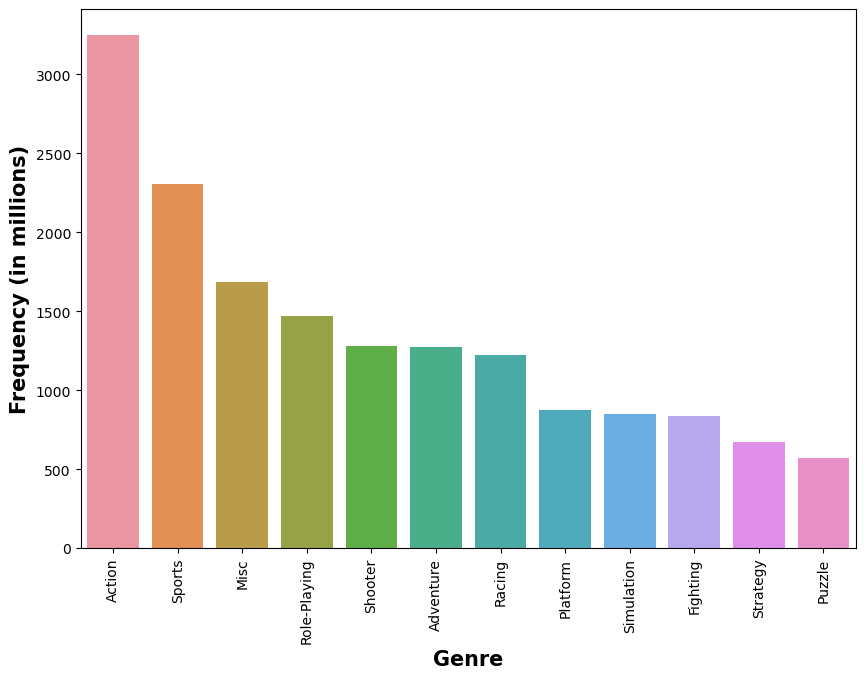

In [39]:
#Let us as well make a barchart of this distribution

plt.figure(figsize=(10,7))

sns.barplot(data=freq, x=freq.index, y=freq.Frequency)
plt.xlabel("Genre", fontweight='bold', fontsize=15)
plt.ylabel('Frequency (in millions)', fontweight='bold', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [40]:
#Let's check if the frequencies sum to 1

freq.sum()

Frequency    16291
dtype: int64

In [41]:
#Let us Visualize the Genre percentages using a pie chart

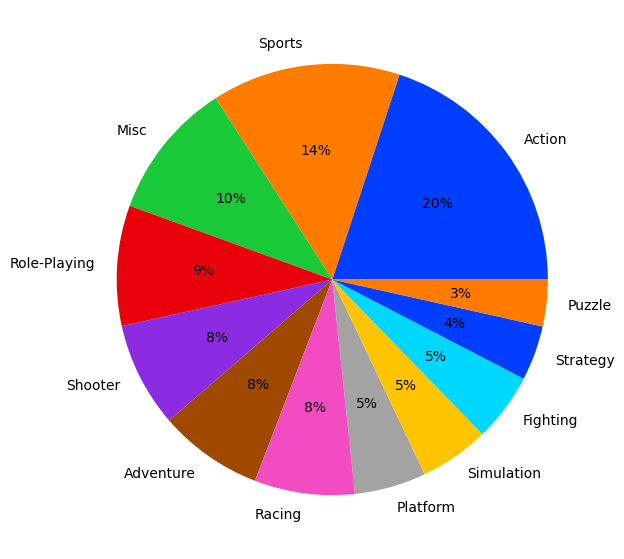

In [42]:
p = df['Genre'].value_counts()
plt.figure(figsize=(10,7))

color = sns.color_palette('bright')

plt.pie(p, labels=p.index, colors=color, autopct='%.0f%%')
plt.show()

### Up next: Identifying outliers  in our Dataset